In [2]:
#step1:Dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Print the shapes
print("Training data shape (images):", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape (images):", x_test.shape)
print("Test labels shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape (images): (60000, 28, 28)
Training labels shape: (60000,)
Test data shape (images): (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
print("Min pixel value (train):", x_train.min())
print("Max pixel value (train):", x_train.max())
#We normalize so that all pixel values are small (between 0 and 1).
#This makes it easier and faster for the neural network to learn, and it helps the model give better results.

Min pixel value (train): 0.0
Max pixel value (train): 1.0


In [6]:
#step.2: creating a sequential model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer(Convert 28x28 image into 1D vector (784 values)
    layers.Dense(128, activation='relu'),  # Hidden layer 1( Hidden layer with 128 neurons)
    layers.Dense(64, activation='relu'),   # Hidden layer 2(Hidden layer with 64 neurons)
    layers.Dense(10, activation='softmax') # Output layer(Output layer with 10 neurons (for digits 0–9))
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


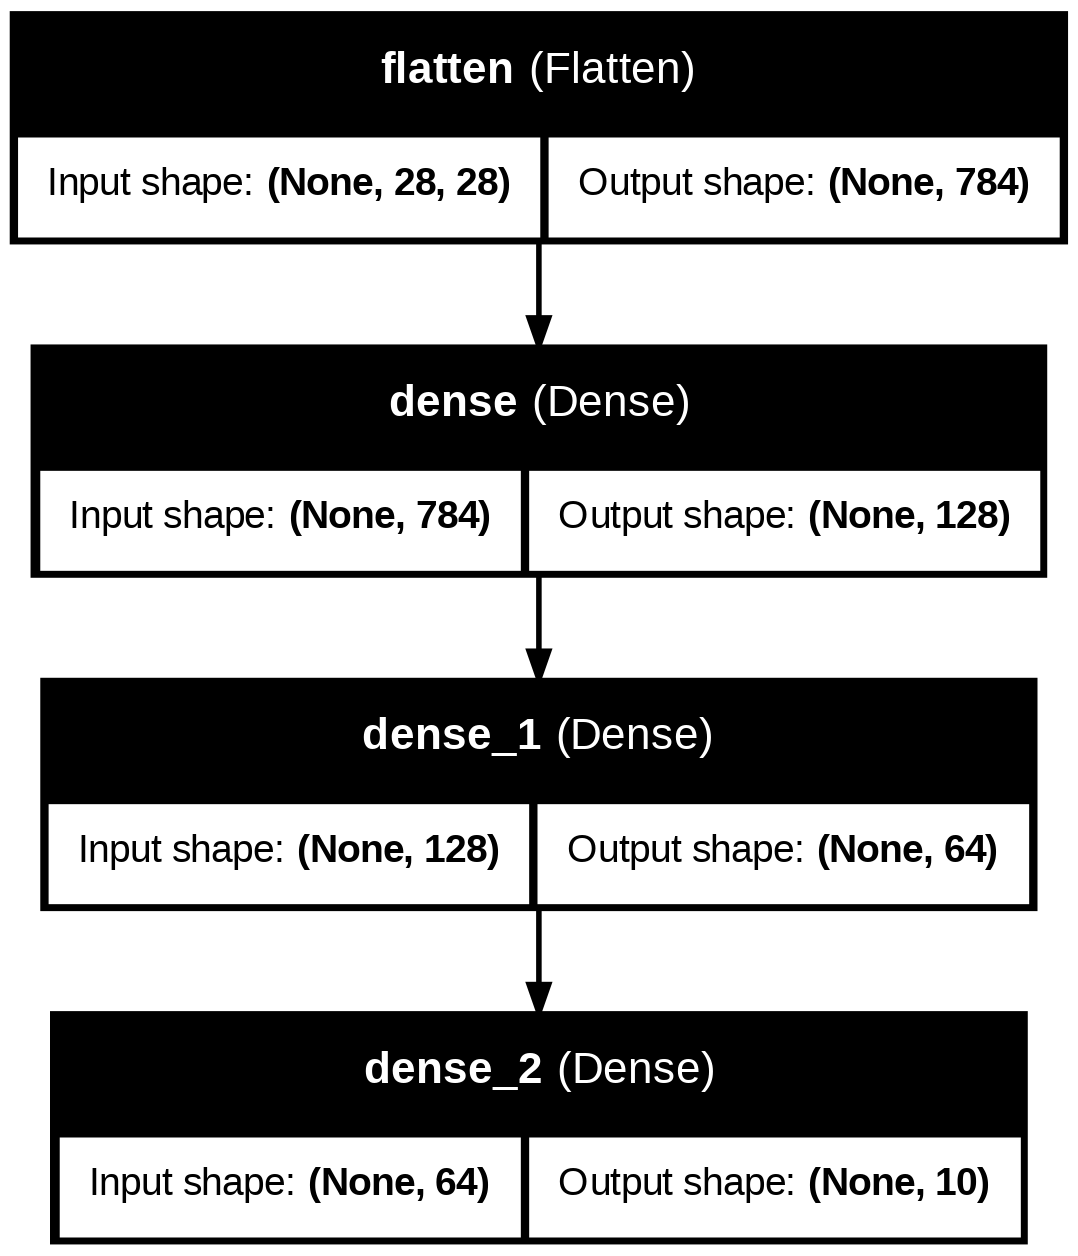

In [7]:
from tensorflow.keras.utils import plot_model

# Save the architecture as an image file
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model.png")


In [8]:
#step3:compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#We use sparse_categorical_crossentropy because MNIST labels are integers, not one-hot encoded.it’s simpler and avoids extra conversion of labels.

In [ ]:
#step4: Train the model for 4 epochs
history_4 = model.fit(x_train, y_train, epochs=4, validation_split=0.1)


Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8667 - loss: 0.4518 - val_accuracy: 0.9622 - val_loss: 0.1258
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9660 - loss: 0.1116 - val_accuracy: 0.9705 - val_loss: 0.0984
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9786 - loss: 0.0731 - val_accuracy: 0.9743 - val_loss: 0.0798
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0524 - val_accuracy: 0.9775 - val_loss: 0.0795


In [ ]:
# Print final training accuracy
final_training_acc = history_4.history['accuracy'][-1]
print(f"Training accuracy after 4 epochs: {final_training_acc:.4f}")



Training accuracy after 4 epochs: 0.9825


In [9]:
# Train the model for 10 epochs
history_10 = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Print final training accuracy
final_train_acc_10 = history_10.history['accuracy'][-1]
print("Final Training Accuracy after 10 epochs:", final_train_acc_10)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8692 - loss: 0.4545 - val_accuracy: 0.9670 - val_loss: 0.1150
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1136 - val_accuracy: 0.9772 - val_loss: 0.0796
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9773 - loss: 0.0742 - val_accuracy: 0.9762 - val_loss: 0.0808
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0511 - val_accuracy: 0.9755 - val_loss: 0.0869
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0401 - val_accuracy: 0.9770 - val_loss: 0.0822
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9785 - val_loss: 0.0826
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9783 - val_loss: 0.0818
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0231 - 

In [ ]:
#Accuracy improved from 4 to 10 epochs, but it does not always improve if we keep training longer.

In [10]:
#Step 5: Evaluate
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print("Test Accuracy:", test_acc)



313/313 - 0s - 1ms/step - accuracy: 0.9769 - loss: 0.0945
Test Accuracy: 0.9768999814987183


In [ ]:
#training accuracy is higher than test accuracy, which shows slight overfitting, but overall the model performs very well on unseen data.

In [11]:
#step6: Make prediction for the first test image
pred = model.predict(x_test[0].reshape(1, 28, 28))  # reshape because model expects a batch
predicted_label = pred.argmax()  # class with highest probability
actual_label = y_test[0]

print("Predicted Label:", predicted_label)
print("Actual Label:", actual_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Label: 7
Actual Label: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Label: 4
Actual Label: 4


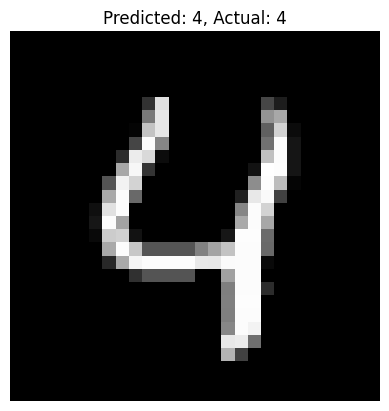

In [12]:
# Make prediction for the 5th test image (index 4)
pred = model.predict(x_test[4].reshape(1, 28, 28))
predicted_label = pred.argmax()
actual_label = y_test[4]

print("Predicted Label:", predicted_label)
print("Actual Label:", actual_label)

# Show the image
import matplotlib.pyplot as plt
plt.imshow(x_test[4], cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.axis('off')
plt.show()


In [13]:
#step7:Experiment
# Create a new Sequential model with an extra Dense(32, ReLU) layer
model2 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Flatten input
    layers.Dense(128, activation='relu'),   # Hidden layer 1
    layers.Dense(64, activation='relu'),    # Hidden layer 2
    layers.Dense(32, activation='relu'),    # NEW hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the new model
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train for 10 epochs
history2 = model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate on test set
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)

print("Test Accuracy with extra Dense(32, ReLU):", test_acc2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8510 - loss: 0.4921 - val_accuracy: 0.9597 - val_loss: 0.1353
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9637 - loss: 0.1172 - val_accuracy: 0.9708 - val_loss: 0.1043
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9770 - loss: 0.0759 - val_accuracy: 0.9748 - val_loss: 0.0860
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0556 - val_accuracy: 0.9762 - val_loss: 0.0882
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9842 - loss: 0.0472 - val_accuracy: 0.9760 - val_loss: 0.0935
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.9745 - val_loss: 0.0860
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9780 - val_loss: 0.0864
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0279 - 

In [ ]:
#Adding a Dense(32, ReLU) layer did not improve accuracy. It stayed almost the same (~97.7%).

In [14]:
# Create a model with the same architecture as before
model3 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile with SGD optimizer instead of Adam
model3.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train for 10 epochs
history3 = model3.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate on test set
test_loss3, test_acc3 = model3.evaluate(x_test, y_test, verbose=2)

print("Test Accuracy with SGD optimizer:", test_acc3)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6265 - loss: 1.2399 - val_accuracy: 0.9175 - val_loss: 0.2853
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9105 - loss: 0.3055 - val_accuracy: 0.9448 - val_loss: 0.1985
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9335 - loss: 0.2304 - val_accuracy: 0.9573 - val_loss: 0.1570
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9455 - loss: 0.1898 - val_accuracy: 0.9637 - val_loss: 0.1345
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9543 - loss: 0.1586 - val_accuracy: 0.9677 - val_loss: 0.1240
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9611 - loss: 0.1335 - val_accuracy: 0.9683 - val_loss: 0.1132
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1227 - val_accuracy: 0.9735 - val_loss: 0.1024
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9683 - loss: 0.1099 - 

In [ ]:
#When using SGD, test accuracy dropped to ~96.7%, which is lower compared to Adam (~97.7%). Thus, Adam performs better for this task.

In [15]:
# Build model with tanh activation in hidden layers
model4 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='tanh'),   # Hidden layer 1
    layers.Dense(64, activation='tanh'),    # Hidden layer 2
    layers.Dense(32, activation='tanh'),    # Hidden layer 3
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile with Adam (best optimizer so far)
model4.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train for 10 epochs
history4 = model4.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Evaluate on test set
test_loss4, test_acc4 = model4.evaluate(x_test, y_test, verbose=2)

print("Test Accuracy with tanh activation:", test_acc4)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8709 - loss: 0.4658 - val_accuracy: 0.9597 - val_loss: 0.1371
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9585 - loss: 0.1392 - val_accuracy: 0.9700 - val_loss: 0.0996
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9737 - loss: 0.0865 - val_accuracy: 0.9738 - val_loss: 0.0943
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9796 - loss: 0.0657 - val_accuracy: 0.9747 - val_loss: 0.0850
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9737 - val_loss: 0.0885
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0363 - val_accuracy: 0.9762 - val_loss: 0.0856
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9901 - loss: 0.0321 - val_accuracy: 0.9768 - val_loss: 0.0887
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0265 - 

In [ ]:
#When replacing ReLU with tanh, test accuracy decreased (from ~97.7% to ~96.9%), showing that ReLU is a better choice for this dataset.